In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

C:\Users\haris\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\haris\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\haris\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

## Prepare Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


## Create Model

In [3]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

C:\Users\haris\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 64)            │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,154 (422.48 KB)

 Trainable params: 108,154 (422.48 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [6]:
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/10


C:\Users\haris\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9585 - loss: 0.1332
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9867 - loss: 0.0422
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9899 - loss: 0.0323
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9916 - loss: 0.0264
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9933 - loss: 0.0212
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9941 - loss: 0.0182
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9948 - loss: 0.0159
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9958 - loss: 0.0129
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9962 - loss: 0.0123
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9961 - loss: 0.0114


## Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

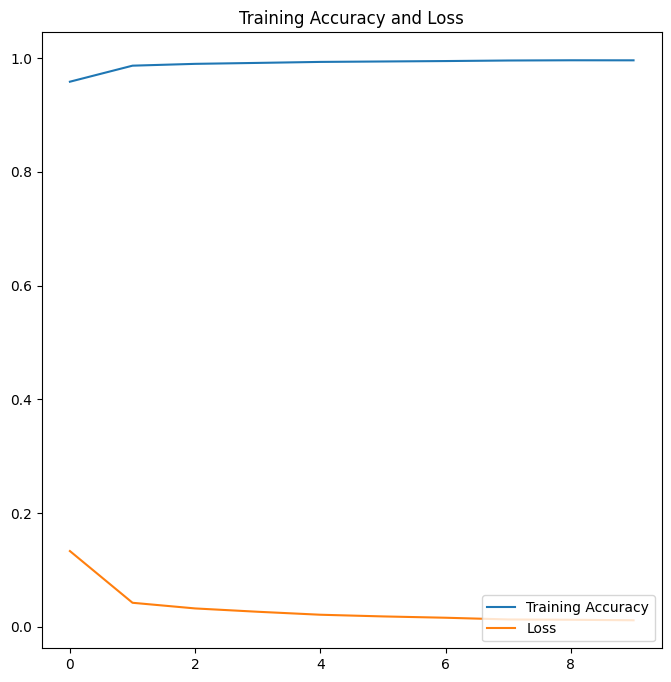

In [7]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')


## Test Image

Prediction of model: [1.0000000e+00 3.0325309e-06 4.2389190e-01 9.8162469e-05 2.7432110e-05
 5.5478769e-05 9.6156937e-01 8.2905183e-04 2.5101168e-02 7.5759512e-01]


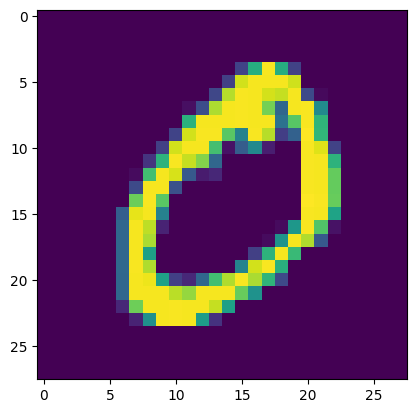

In [9]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: [1.7790202e-05 4.3568465e-01 4.4725378e-04 1.7463314e-09 1.0000000e+00
 3.5544929e-07 2.0293722e-07 1.1400821e-03 1.2304350e-04 9.9998271e-01]


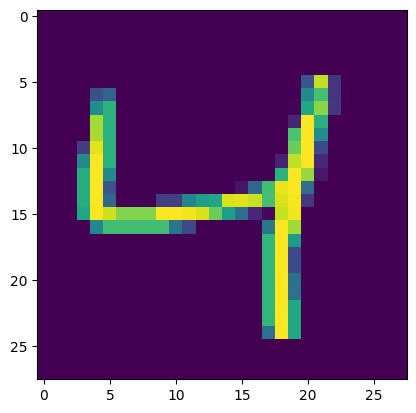

In [10]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

## Test Multiple Image

Test images array shape: (4, 28, 28)
Predicted digit: [3.34698016e-05 1.24330502e-02 1.00000000e+00 2.07717836e-01
 1.65556872e-03 1.09330778e-09 3.74832703e-03 1.27079282e-02
 1.16343035e-04 6.79700747e-02]
Predicted digit: [1.8361729e-03 9.9999279e-01 6.9202655e-03 1.2082815e-05 1.1179164e-02
 2.0754654e-03 6.9602015e-03 2.4495846e-02 9.8185847e-03 7.7781238e-05]
Predicted digit: [1.0000000e+00 3.9386436e-05 7.0988737e-02 5.1371154e-04 1.0179548e-05
 7.1249362e-03 9.9918872e-01 1.6871152e-03 7.1582508e-01 7.6314397e-02]
Predicted digit: [5.6196543e-05 2.8155910e-02 3.8272083e-05 2.0401345e-09 1.0000000e+00
 8.8208799e-06 5.5893522e-04 9.1724627e-04 2.3040900e-03 9.9978435e-01]


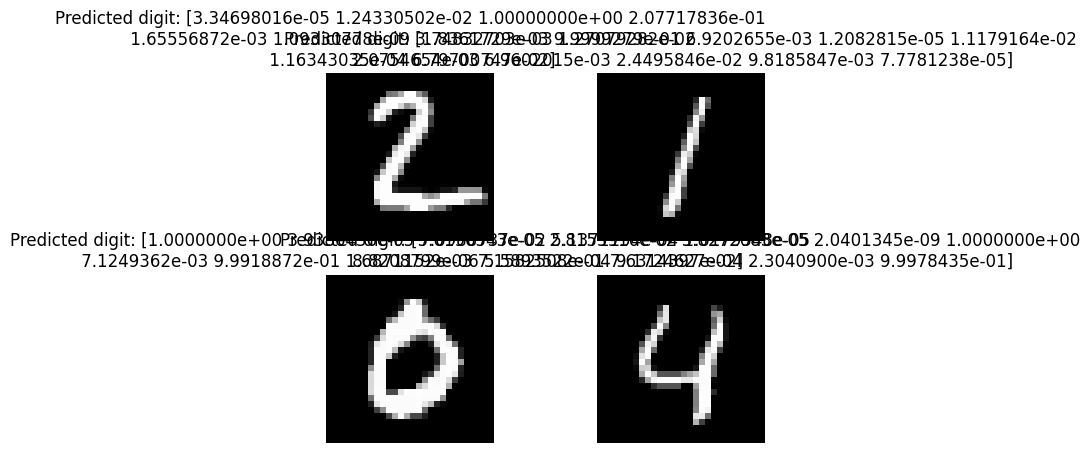

In [11]:

images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()


## Save Model

In [12]:
model.save("tf-cnn-model.h5")

## Load Model

In [13]:
loaded_model = models.load_model("tf-cnn-model.h5")

Prediction of model: [1.7790202e-05 4.3568465e-01 4.4725378e-04 1.7463314e-09 1.0000000e+00
 3.5544929e-07 2.0293722e-07 1.1400821e-03 1.2304350e-04 9.9998271e-01]


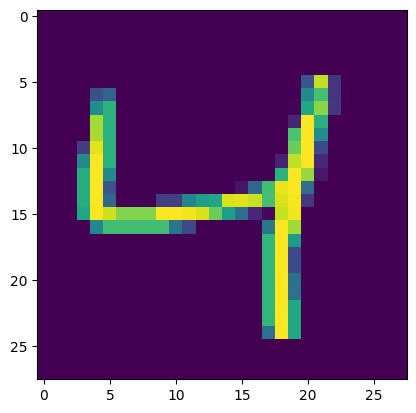

In [14]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = loaded_model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))